In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_depth = np.zeros(n_nodes, dtype=np.int64)
is_leaves = np.zeros(n_nodes, dtype=bool)
stack = [(0,0)]

while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    
    is_split_node = children_left[node_id] != children_right[node_id]

    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)

for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 2] <= 2.449999988079071 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 3] <= 1.75 else to node 10.
		node=3 is a split node: go to node 4 if X[:, 2] <= 4.950000047683716 else to node 7.
			node=4 is a split node: go to node 5 if X[:, 3] <= 1.6500000357627869 else to node 6.
				node=5 is a leaf node.
				node=6 is a leaf node.
			node=7 is a split node: go to node 8 if X[:, 3] <= 1.550000011920929 else to node 9.
				node=8 is a leaf node.
				node=9 is a leaf node.
		node=10 is a split node: go to node 11 if X[:, 2] <= 4.8500001430511475 else to node 14.
			node=11 is a split node: go to node 12 if X[:, 1] <= 3.100000023841858 else to node 13.
				node=12 is a leaf node.
				node=13 is a leaf node.
			node=14 is a leaf node.


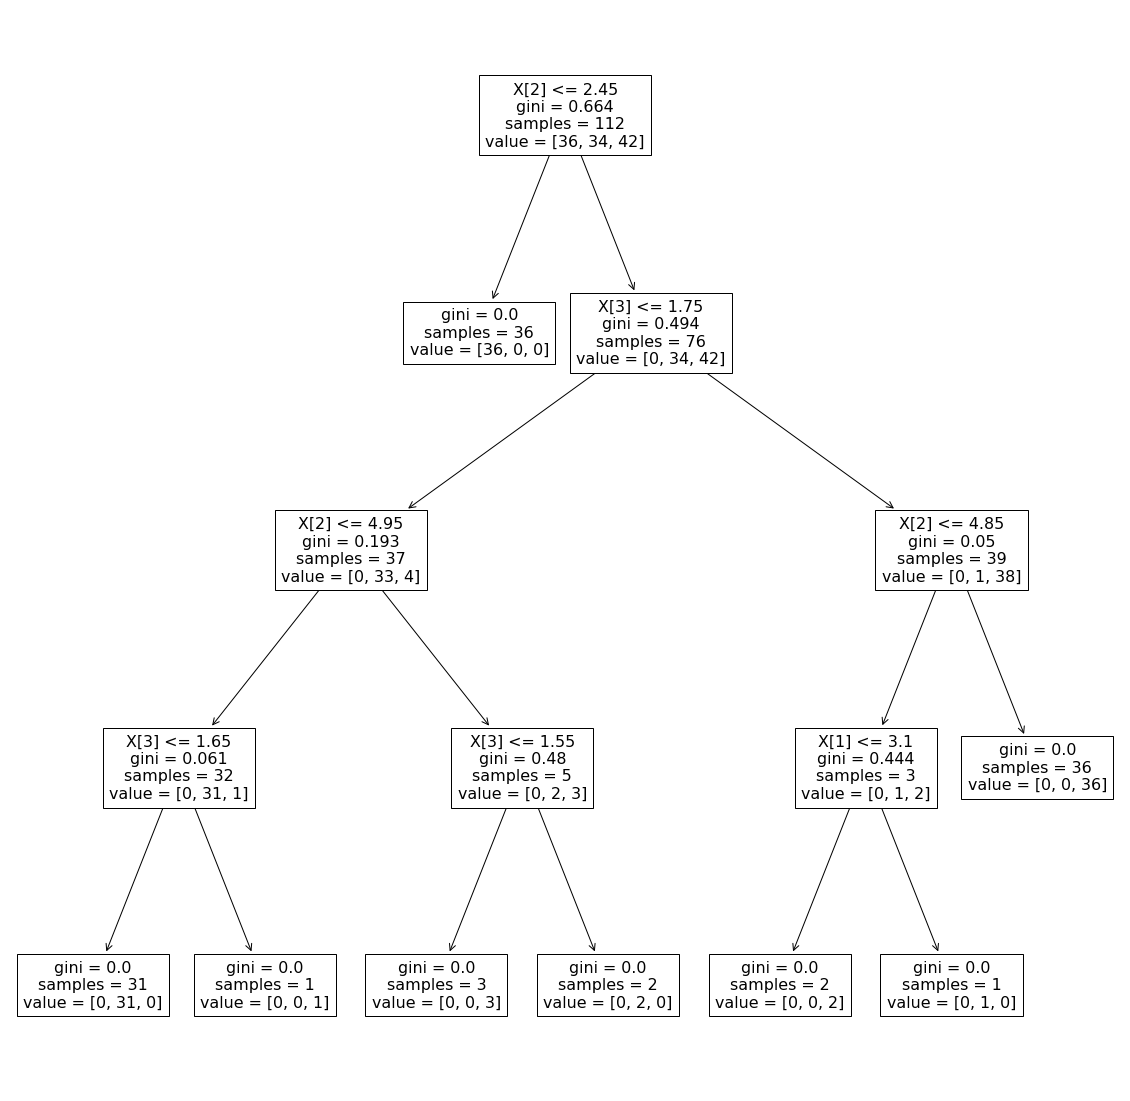

In [41]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf)

plt.show()